# Análise Quantitativa das 7 maiores empresas tecno dos EUA: Por que a NVDA é a mais "tradable"?

Uma vez que a Análise Quantitativa, com seus métodos estatísticos, matemáticos, probabilísticos e computacionais em Inteligência Artificial é uma evolução da Análise Técnica, resolvi divulgar esse breve trabalho ao modelar as principais métricas financeiras citadas no artigo "Deep learning in the stock market—a systematic survey of practice, backtesting, and applications" (2022) de Olorunnimbe e Viktor.

Ao criar funções para calcular métricas financeiras das 7 maiores (Magnificant 7) empresas americanas de tecnologia dos últimos 10 anos, conclui-se que a NVIDIA Corp (ticker NVDA) possui:

 ✔ Maiores Retorno e retorno acumulado;

 ✔ Maior excesso de Retorno, que se traduz na diferença entre o retorno das ações e a taxa média do T bond americano com vencimento em 10 anos;

 ✔ Segunda maior Volatilidade, que se traduz no desvio padrão do retorno e que, ao contrário do que a maioria pensa, se traduz em Oportunidade;  

 ✔ Maior Sharpe Ratio, sendo a razão entre o Excesso de Retorno e a Volatilidade. (Considera-se um bom Sharpe acima de 1);

 ✔ A alavancagem ótima do Critério de Kelly é a terceira melhor;

 ✔ O maior Sortino Ratio, sendo esse o excesso de retorno ajustado pelos retornos negativos. Quanto maior, menor o risco;

 ✔ Terceiro menor Drawdown Máximo, sendo esse a maior perda percentual do valor das ações num período. Considera-se um bom número valores abaixo de 25%;

 ✔ O maior Calmar Ratio, sendo esse a razão entre excesso de retorno e Drawdown máximo. Considera-se um bom número valores acima de 1;

 ✔ O maior Beta, significando que as ações da NVDA são altamente sensíveis ás flutuações do S&P 500;

 ✔ Maior Treynor Ratio, devido ao seu denominador ser o Beta. Mede o risco das ações que são altamente sensíveis ao risco sistêmico ( do mercado). Considera-se um Treynor Ratio quanto maior, melhor, pois significa folga do excesso de retorno em relação ao risco de mercado;

 ✔ Maior Média Móvel Exponencialmente Ponderada (EWMA), juntamente à Tesla. Mede a ponderação da volatilidade pelos retornos mais recentes;

 ✔ Maior Desvio da EWMA, apontando que a ponderação da volatilidade pelos retornos mais recentes está refletindo fatores (sistêmicos ou não) que alteram o preço e consequentemente o retorno das ações;

 ✔ Maior Var Paramétrico, este presumindo uma Distribuição Normal dos dados. Uma vez que o que gera dinheiro de fato é o movimento browniano e a física das partículas de eventos raros, deixo essa métrica para fins didáticos.



# Importar bibliotecas

In [1]:
!pip install yfinance -q
import yfinance as yf
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import math
!pip install python-bcb -q
from bcb import sgs

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Estatística
from scipy import stats
from scipy.stats import norm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00


In [2]:
tickers = ['GOOG', 'AMZN', 'AAPL', 'META', 'MSFT', 'NVDA', 'TSLA', '^GSPC']

cotacao = yf.download(tickers, start='2014-01-01').dropna()['Adj Close']
cotacao.rename(columns={"^GSPC": "SP500"}, inplace=True)
cotacao

[*********************100%%**********************]  8 of 8 completed


Ticker            AAPL        AMZN        GOOG        META        MSFT  \
Date                                                                     
2014-01-02   17.273226   19.898500   27.724083   54.652012   31.176832   
2014-01-03   16.893806   19.822001   27.521841   54.502174   30.967085   
2014-01-06   16.985928   19.681499   27.828691   57.139374   30.312677   
2014-01-07   16.864447   19.901501   28.365179   57.858608   30.547592   
2014-01-08   16.971252   20.096001   28.424210   58.168282   30.002237   
...                ...         ...         ...         ...         ...   
2024-05-24  189.979996  180.750000  176.330002  478.220001  430.160004   
2024-05-28  189.990005  182.149994  178.020004  479.920013  430.320007   
2024-05-29  190.289993  182.020004  177.399994  474.359985  429.170013   
2024-05-30  191.289993  179.320007  173.559998  467.049988  414.670013   
2024-05-31  192.250000  176.440002  173.960007  466.829987  415.130005   

Ticker             NVDA        TSLA        SP500  
Date                                              
2014-01-02     3.740547   10.006667  1831.979980  
2014-01-03     3.695736    9.970667  1831.369995  
2014-01-06     3.745264    9.800000  1826.770020  
2014-01-07     3.806585    9.957333  1837.880005  
2014-01-08     3.858472   10.085333  1837.489990  
...                 ...         ...          ...  
2024-05-24  1064.689941  179.240005  5304.720215  
2024-05-28  1139.010010  176.750000  5306.040039  
2024-05-29  1148.250000  176.190002  5266.950195  
2024-05-30  1105.000000  178.789993  5235.479980  
2024-05-31  1096.329956  178.080002  5277.509766  

[2621 rows x 8 columns]

In [3]:
cotacao.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2621 entries, 2014-01-02 to 2024-05-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2621 non-null   float64
 1   AMZN    2621 non-null   float64
 2   GOOG    2621 non-null   float64
 3   META    2621 non-null   float64
 4   MSFT    2621 non-null   float64
 5   NVDA    2621 non-null   float64
 6   TSLA    2621 non-null   float64
 7   SP500   2621 non-null   float64
dtypes: float64(8)
memory usage: 184.3 KB


# 1) Retorno

In [4]:
# Função para calcular o retorno diário das ações

def ret(cotacao):
  retorn = cotacao.pct_change()
  return retorn

retorno = cotacao.apply(ret, axis=0)
retorno = retorno.fillna(0)
retorno.head()

Ticker          AAPL      AMZN      GOOG      META      MSFT      NVDA  \
Date                                                                     
2014-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2014-01-03 -0.021966 -0.003845 -0.007295 -0.002742 -0.006728 -0.011980   
2014-01-06  0.005453 -0.007088  0.011149  0.048387 -0.021132  0.013401   
2014-01-07 -0.007152  0.011178  0.019278  0.012587  0.007750  0.016373   
2014-01-08  0.006333  0.009773  0.002081  0.005352 -0.017853  0.013631   

Ticker          TSLA     SP500  
Date                            
2014-01-02  0.000000  0.000000  
2014-01-03 -0.003598 -0.000333  
2014-01-06 -0.017117 -0.002512  
2014-01-07  0.016054  0.006082  
2014-01-08  0.012855 -0.000212

In [5]:
# Estatísticas descritivas do retorno

retorno.describe()

Ticker         AAPL         AMZN         GOOG         META         MSFT  \
count   2621.000000  2621.000000  2621.000000  2621.000000  2621.000000   
mean       0.001077     0.001047     0.000856     0.001104     0.001131   
std        0.017743     0.020712     0.017634     0.023754     0.016888   
min       -0.128647    -0.140494    -0.111008    -0.263901    -0.147390   
25%       -0.007152    -0.008714    -0.007107    -0.009466    -0.006728   
50%        0.000891     0.001043     0.000979     0.001078     0.000841   
75%        0.010079     0.011175     0.009404     0.012370     0.009796   
max        0.119808     0.141311     0.160524     0.232824     0.142169   

Ticker         NVDA         TSLA        SP500  
count   2621.000000  2621.000000  2621.000000  
mean       0.002596     0.001711     0.000465  
std        0.029384     0.035047     0.011038  
min       -0.187559    -0.210628    -0.119841  
25%       -0.011473    -0.015739    -0.003762  
50%        0.002380     0.001041     0.000598  
75%        0.016496     0.018301     0.005690  
max        0.298067     0.198949     0.093828

# 2) Heatmap dos retornos anuais individuais

In [6]:
# Converter as bases para retorno mensal

retorno_mensal = retorno.resample("M", kind='period').last().dropna()
retorno_mensal.rename(columns = {'Adj Close': 'Retorno'}, inplace=True)
retorno_mensal.head()

Ticker       AAPL      AMZN      GOOG      META      MSFT      NVDA      TSLA  \
Date                                                                            
2014-01  0.001641 -0.109972  0.040145  0.024394  0.026587 -0.001272 -0.007821   
2014-02 -0.002710  0.005470 -0.002920 -0.006963  0.011886 -0.006486 -0.030609   
2014-03 -0.000223 -0.005676 -0.005393  0.003833  0.017122  0.000558 -0.018458   
2014-04 -0.003782  0.012484 -0.001971  0.028031 -0.002715 -0.011772  0.004688   
2014-05 -0.003746 -0.003920 -0.000339 -0.008303  0.014873  0.002638 -0.011749   

Ticker      SP500  
Date               
2014-01 -0.006465  
2014-02  0.002783  
2014-03  0.007924  
2014-04  0.002992  
2014-05  0.001844

In [7]:
# Criar e adicionar as colunas de mês e ano

retorno_mensal['Mês'] = retorno_mensal.index.month
retorno_mensal['Ano'] = retorno_mensal.index.year

retorno_mensal.tail()

Ticker       AAPL      AMZN      GOOG      META      MSFT      NVDA      TSLA  \
Date                                                                            
2024-01 -0.019358 -0.023899 -0.073505 -0.024796 -0.026946 -0.019865 -0.022444   
2024-02 -0.003693  0.020790  0.017100  0.012623  0.014520  0.018658 -0.000792   
2024-03 -0.010559  0.003058  0.002106 -0.016766 -0.001685  0.001175 -0.022466   
2024-04 -0.018271 -0.032935 -0.019416 -0.005663 -0.032119 -0.015440 -0.055501   
2024-05  0.005019 -0.016061  0.002305 -0.000471  0.001109 -0.007846 -0.003971   

Ticker      SP500  Mês   Ano  
Date                          
2024-01 -0.016106    1  2024  
2024-02  0.005229    2  2024  
2024-03  0.001116    3  2024  
2024-04 -0.015731    4  2024  
2024-05  0.008028    5  2024

In [8]:
# Pivotar dados para indexar os meses anualmente

tab_retorno_mensal = retorno_mensal.pivot( index='Ano', columns='Mês')
tab_retorno_mensal

Ticker      AAPL                                                              \
Mês           1         2         3         4         5         6         7    
Ano                                                                            
2014    0.001641 -0.002710 -0.000223 -0.003782 -0.003746  0.010328 -0.025981   
2015   -0.014634 -0.015028 -0.015352 -0.027130 -0.011383  0.007227 -0.008744   
2016    0.034541 -0.002270 -0.005203 -0.011494 -0.004883  0.012712 -0.001246   
2017   -0.002302  0.000439 -0.001876 -0.000973 -0.005922  0.002366 -0.005151   
2018    0.002755 -0.001513  0.007809  0.018112 -0.003360 -0.002102  0.002001   
2019    0.007201 -0.009836  0.006518 -0.019256 -0.018115 -0.009112  0.020404   
2020   -0.044339 -0.000585 -0.002041  0.021096 -0.000974  0.008347  0.104689   
2021   -0.037421  0.002232  0.018766 -0.015133 -0.005348  0.004621  0.001511   
2022    0.026126  0.001638 -0.017776 -0.036605 -0.005346 -0.018028  0.032793   
2023    0.009021 -0.003448  0.015644  0.007541 -0.000282  0.023103  0.003166   
2024   -0.019358 -0.003693 -0.010559 -0.018271  0.005019       NaN       NaN   

Ticker                                ...     SP500                      \
Mês           8         9         10  ...        3         4         5    
Ano                                   ...                                 
2014    0.002445  0.006393  0.009535  ...  0.007924  0.002992  0.001844   
2015   -0.004678  0.011370 -0.008546  ... -0.008796 -0.010129 -0.006318   
2016    0.000943  0.007755 -0.001583  ... -0.002040 -0.005063 -0.001005   
2017    0.003979  0.005480  0.013916  ... -0.002255 -0.001913 -0.000460   
2018    0.011554  0.003512  0.026067  ...  0.013770 -0.008187 -0.006880   
2019   -0.001292  0.023535  0.022610  ...  0.006734  0.000951 -0.013195   
2020    0.033912  0.015076 -0.056018  ... -0.016013 -0.009212  0.004812   
2021   -0.008425 -0.009312 -0.018156  ...  0.003622 -0.007195  0.000769   
2022   -0.010635 -0.030039 -0.015410  ... -0.015653 -0.036285 -0.006274   
2023    0.001172  0.003046  0.002819  ...  0.014437  0.008253 -0.006109   
2024         NaN       NaN       NaN  ...  0.001116 -0.015731  0.008028   

Ticker                                                                        
Mês           6         7         8         9         10        11        12  
Ano                                                                           
2014   -0.000372 -0.019999  0.003320 -0.002786  0.011731 -0.002542 -0.010311  
2015    0.002658 -0.002272 -0.008392  0.019076 -0.004810 -0.004641 -0.009412  
2016    0.013565  0.001631 -0.002376  0.007968 -0.000122 -0.002653 -0.004637  
2017    0.001533 -0.000728  0.005721  0.003705  0.000944  0.008191 -0.005183  
2018    0.000758  0.004885  0.000134 -0.000007  0.010851  0.008171  0.008492  
2019    0.005757 -0.010886  0.000643  0.005048 -0.003023 -0.004011  0.002946  
2020    0.015410  0.007671 -0.002195  0.008254 -0.012130 -0.004596  0.006439  
2021    0.001328 -0.005406 -0.001349 -0.011910  0.001949 -0.018961 -0.002626  
2022   -0.008759  0.014208 -0.007817 -0.015067 -0.007454  0.030948 -0.002541  
2023    0.012269  0.001469 -0.001597 -0.002710  0.006475  0.003784 -0.002826  
2024         NaN       NaN       NaN       NaN       NaN       NaN       NaN  

[11 rows x 96 columns]

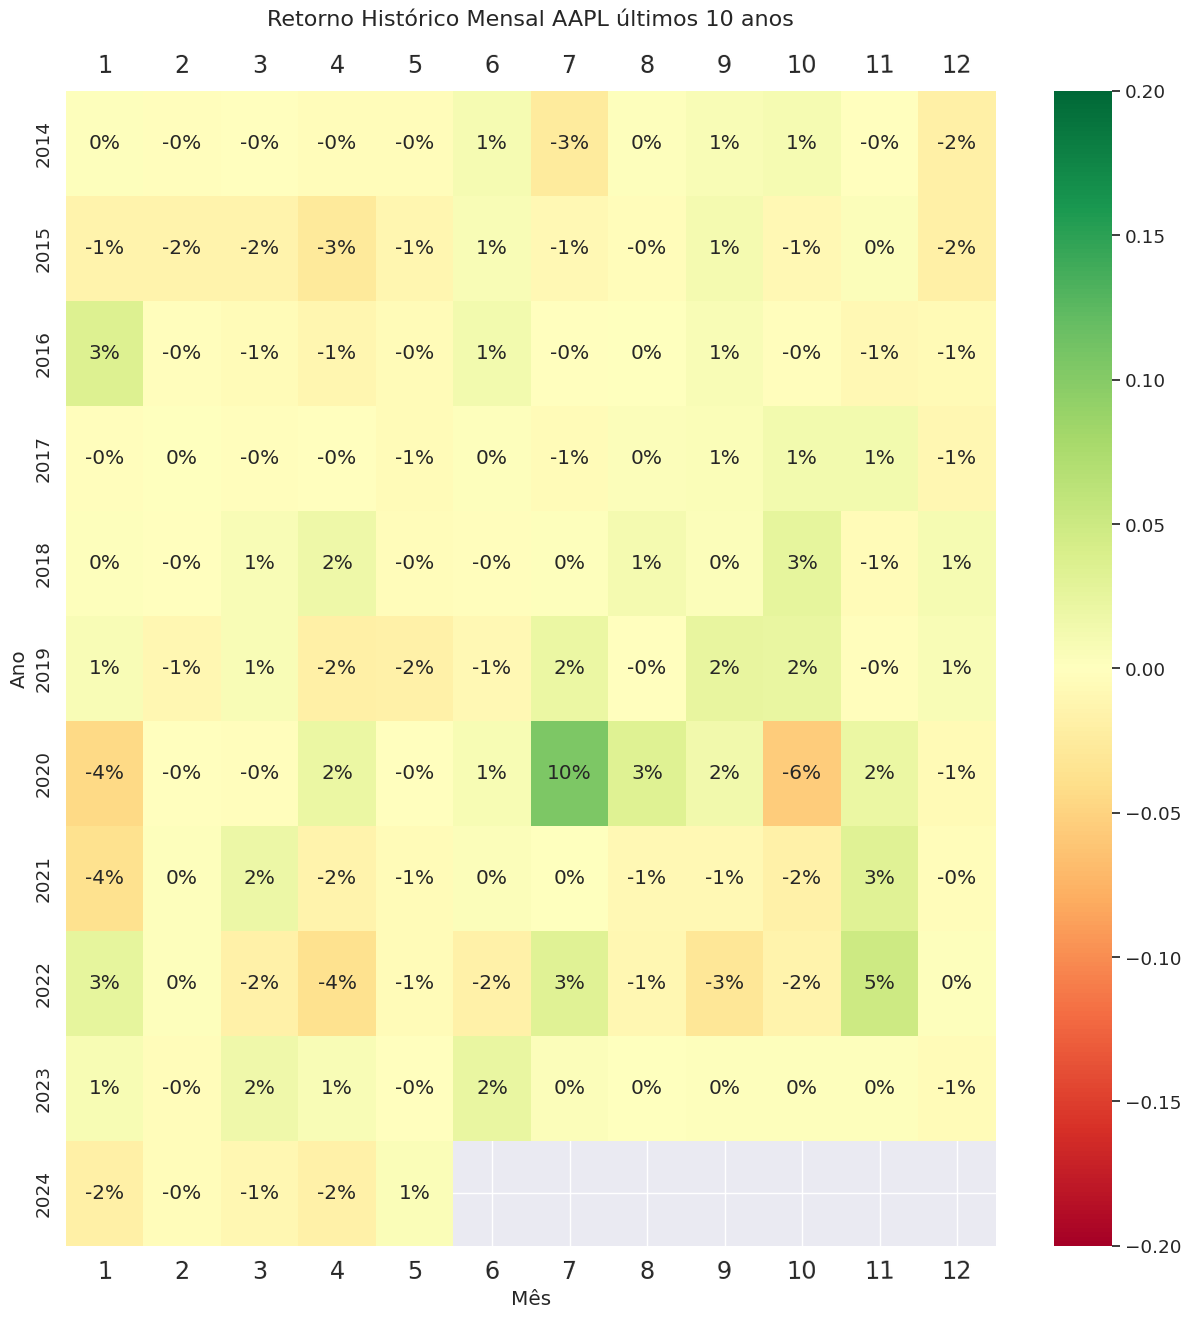

In [9]:
# Heatmap do Retorno Histórico Mensal AAPL últimos 10 anos

# Uma possível explicação do retorno de 10% em Julho/2020. https://www.investopedia.com/apple-earnings-4685688
# OBS: Explicações Fundamentalistas somente servem quando são estatisticamente testadas.
# Todavia, este teste não faz parte do escopo desse trabalho.

# Caso queira retirar a barra de +0,2 a -0,2, acrescentar a última linha de codigo cbar = False


plt.figure(figsize=(15,15))                             # Tamanho da figura
sns.set(font_scale=1.2)                                 # Escala da fonte
ax = sns.heatmap(tab_retorno_mensal['AAPL'],
                 annot = True,                          # Acrescenta o valor em cada célula
                 fmt = '.0%',                           # Insere o número de casas decimais do valor
                 center =0,                             # Estabelece a posição do valor
                 vmin=-0.2,                             # Range mínimo de ancoramento dos valores
                 vmax=0.2,                              # Range máximo de ancoramento dos valores
                 cmap='RdYlGn')                         # Range de paleta de cores entre verde e vermelho
ax.set_title('Retorno Histórico Mensal AAPL últimos 10 anos', fontdict={'fontsize':16, 'fontweight':6},pad=20);
ax.tick_params('x', labelsize='large', labelrotation=0.9, labeltop = True)

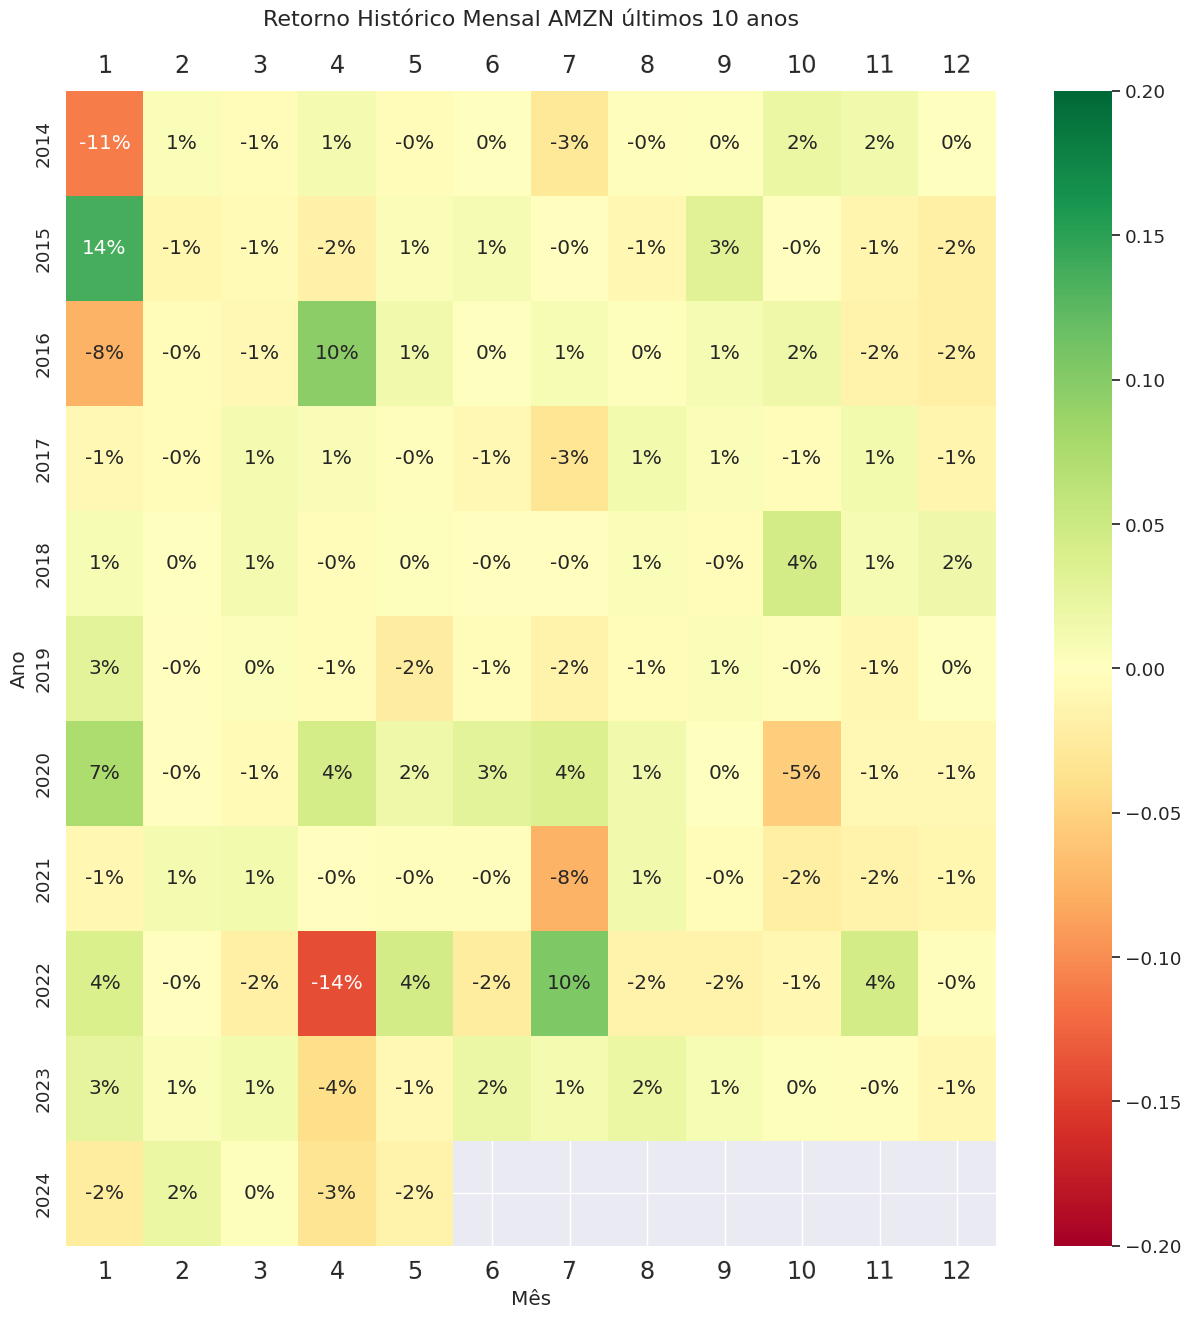

In [10]:
# Heatmap do Retorno Histórico Mensal AMZN últimos 10 anos

# AMZN apresenta volatilidade maior de retorno em janeiro de alguns anos.
# Uma estratégia de trading sobre o PEAD (Post-earnings announcement drift) pode ser backtestada nesse período.
# Além disso, o retorno apresentou reversão á média entre jan/2022 a jul/2022.


plt.figure(figsize=(15,15))                             # Tamanho da figura
sns.set(font_scale=1.2)                                 # Escala da fonte
ax = sns.heatmap(tab_retorno_mensal['AMZN'],
                 annot = True,                          # Acrescenta o valor em cada célula
                 fmt = '.0%',                           # Insere o número de casas decimais do valor
                 center =0,                             # Estabelece a posição do valor
                 vmin=-0.2,                             # Range mínimo de ancoramento dos valores
                 vmax=0.2,                              # Range máximo de ancoramento dos valores
                 cmap='RdYlGn')                         # Range de paleta de cores entre verde e vermelho
ax.set_title('Retorno Histórico Mensal AMZN últimos 10 anos', fontdict={'fontsize':16, 'fontweight':6},pad=20);
ax.tick_params('x', labelsize='large', labelrotation=0.9, labeltop = True)

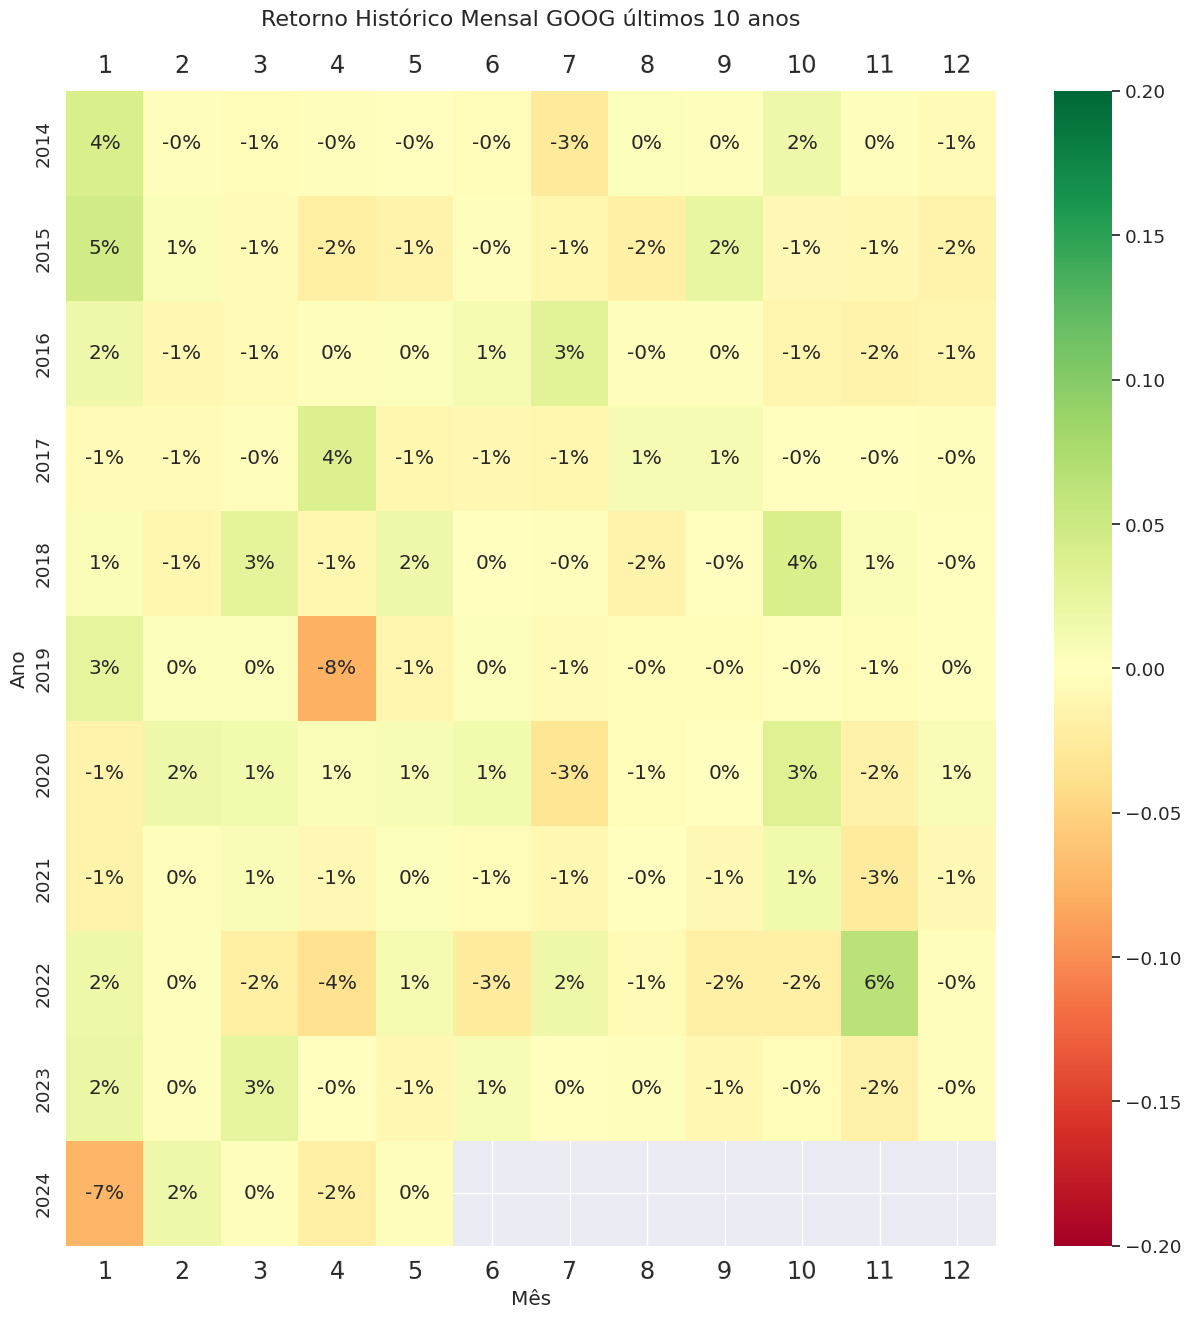

In [11]:
# Heatmap do Retorno Histórico Mensal GOOG últimos 10 anos


plt.figure(figsize=(15,15))                             # Tamanho da figura
sns.set(font_scale=1.2)                                 # Escala da fonte
ax = sns.heatmap(tab_retorno_mensal['GOOG'],
                 annot = True,                          # Acrescenta o valor em cada célula
                 fmt = '.0%',                           # Insere o número de casas decimais do valor
                 center =0,                             # Estabelece a posição do valor
                 vmin=-0.2,                             # Range mínimo de ancoramento dos valores
                 vmax=0.2,                              # Range máximo de ancoramento dos valores
                 cmap='RdYlGn')                         # Range de paleta de cores entre verde e vermelho
ax.set_title('Retorno Histórico Mensal GOOG últimos 10 anos', fontdict={'fontsize':16, 'fontweight':6},pad=20);
ax.tick_params('x', labelsize='large', labelrotation=0.9, labeltop = True)

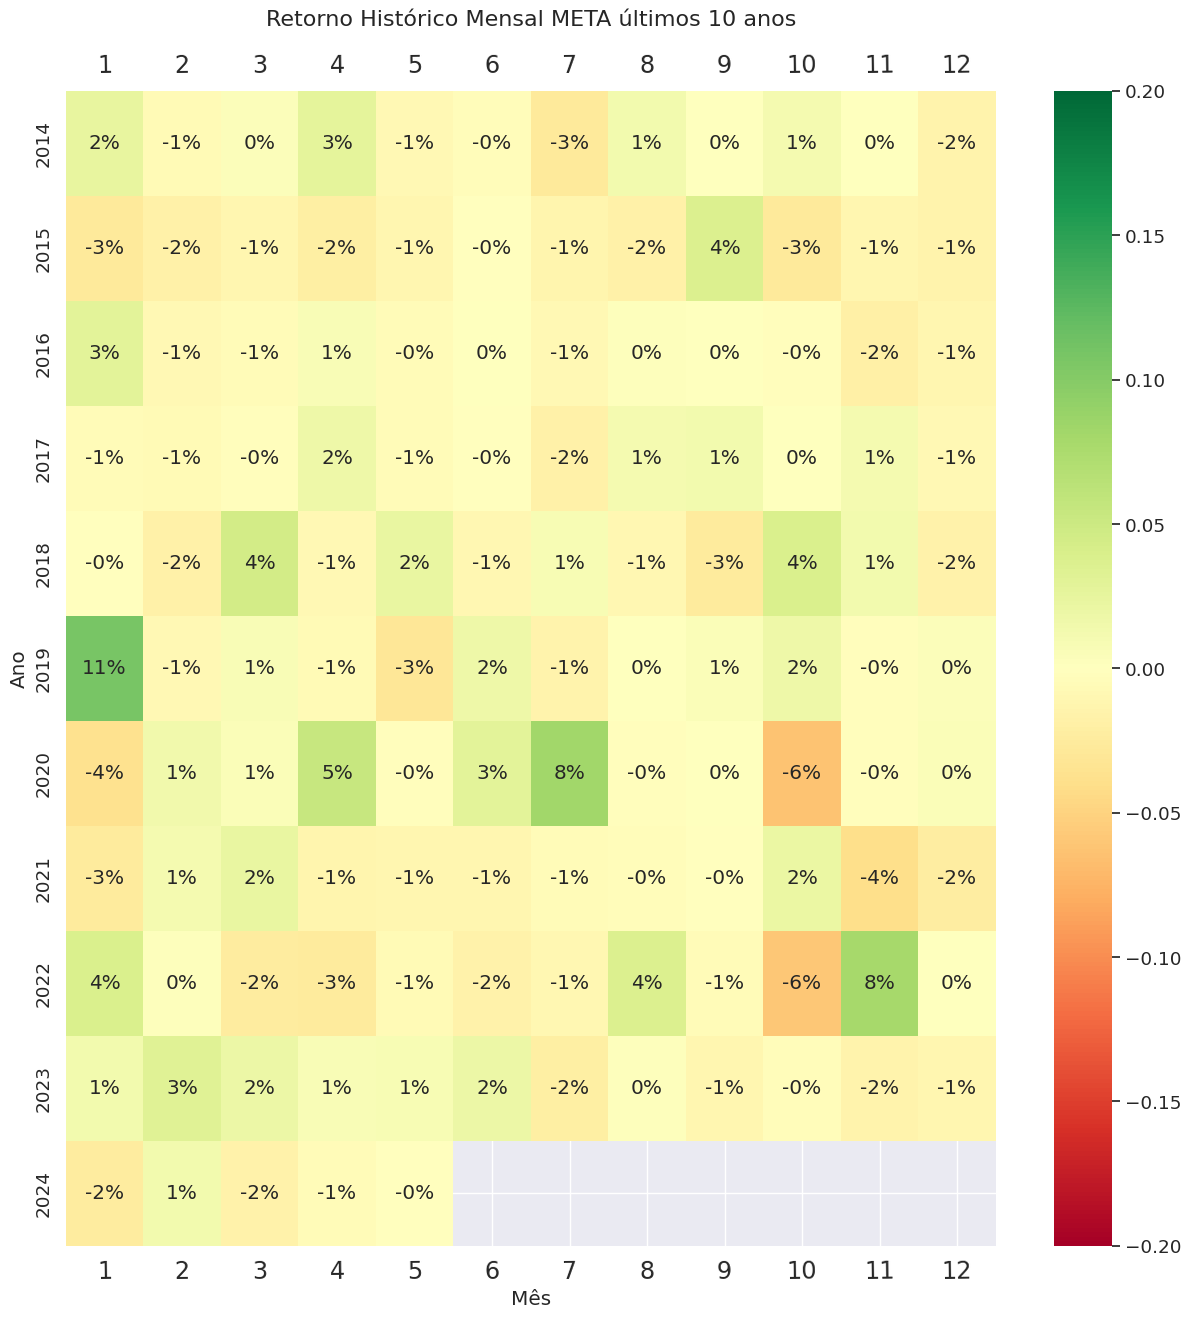

In [12]:
# Heatmap do Retorno Histórico Mensal META últimos 10 anos


plt.figure(figsize=(15,15))                             # Tamanho da figura
sns.set(font_scale=1.2)                                 # Escala da fonte
ax = sns.heatmap(tab_retorno_mensal['META'],
                 annot = True,                          # Acrescenta o valor em cada célula
                 fmt = '.0%',                           # Insere o número de casas decimais do valor
                 center =0,                             # Estabelece a posição do valor
                 vmin=-0.2,                             # Range mínimo de ancoramento dos valores
                 vmax=0.2,                              # Range máximo de ancoramento dos valores
                 cmap='RdYlGn')                         # Range de paleta de cores entre verde e vermelho
ax.set_title('Retorno Histórico Mensal META últimos 10 anos', fontdict={'fontsize':16, 'fontweight':6},pad=20);
ax.tick_params('x', labelsize='large', labelrotation=0.9, labeltop = True)

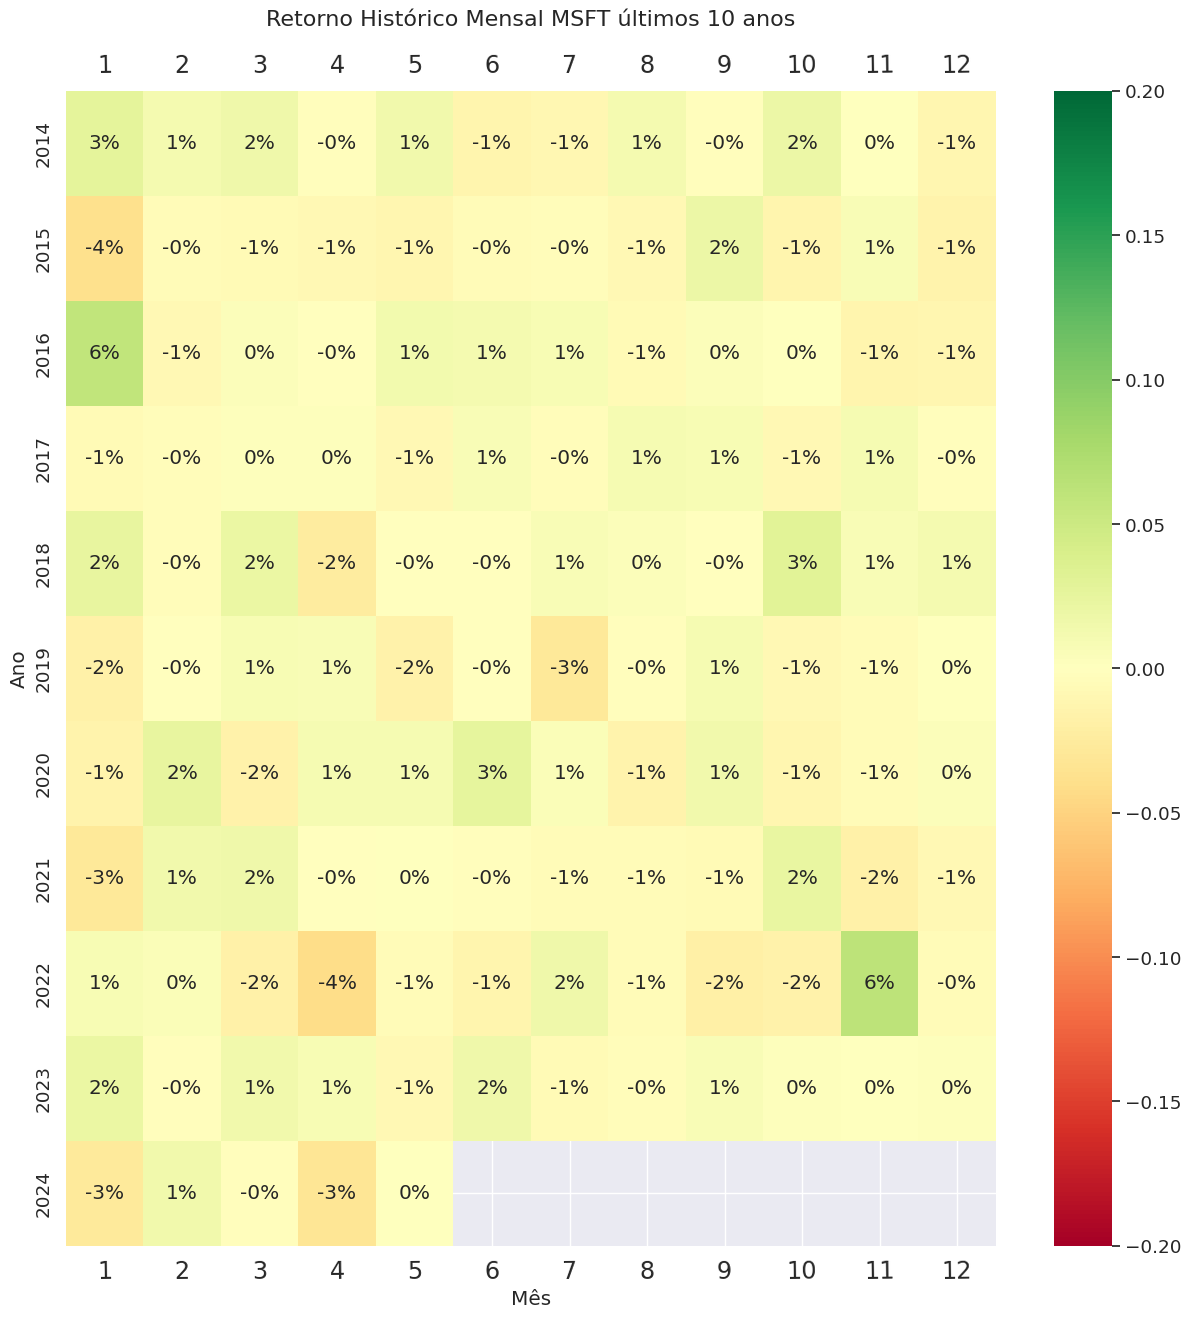

In [13]:
# Heatmap do Retorno Histórico Mensal MSFT últimos 10 anos


plt.figure(figsize=(15,15))                             # Tamanho da figura
sns.set(font_scale=1.2)                                 # Escala da fonte
ax = sns.heatmap(tab_retorno_mensal['MSFT'],
                 annot = True,                          # Acrescenta o valor em cada célula
                 fmt = '.0%',                           # Insere o número de casas decimais do valor
                 center =0,                             # Estabelece a posição do valor
                 vmin=-0.2,                             # Range mínimo de ancoramento dos valores
                 vmax=0.2,                              # Range máximo de ancoramento dos valores
                 cmap='RdYlGn')                         # Range de paleta de cores entre verde e vermelho
ax.set_title('Retorno Histórico Mensal MSFT últimos 10 anos', fontdict={'fontsize':16, 'fontweight':6},pad=20);
ax.tick_params('x', labelsize='large', labelrotation=0.9, labeltop = True)

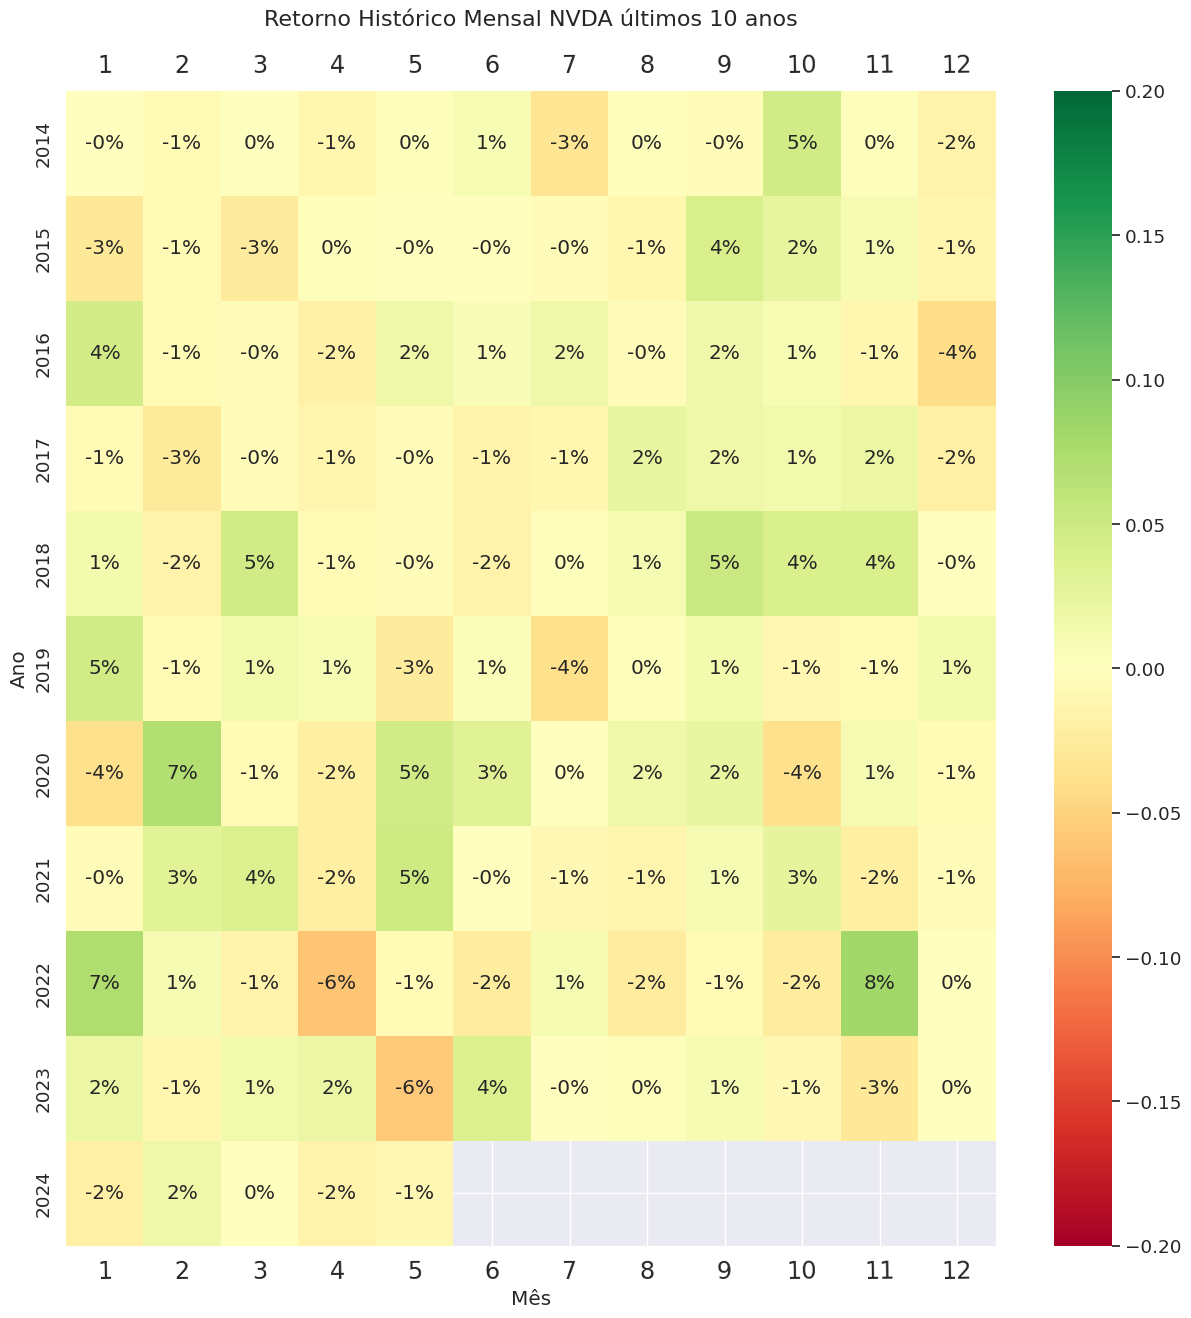

In [14]:
# Heatmap do Retorno Histórico Mensal NVDA últimos 10 anos


plt.figure(figsize=(15,15))                             # Tamanho da figura
sns.set(font_scale=1.2)                                 # Escala da fonte
ax = sns.heatmap(tab_retorno_mensal['NVDA'],
                 annot = True,                          # Acrescenta o valor em cada célula
                 fmt = '.0%',                           # Insere o número de casas decimais do valor
                 center =0,                             # Estabelece a posição do valor
                 vmin=-0.2,                             # Range mínimo de ancoramento dos valores
                 vmax=0.2,                              # Range máximo de ancoramento dos valores
                 cmap='RdYlGn')                         # Range de paleta de cores entre verde e vermelho
ax.set_title('Retorno Histórico Mensal NVDA últimos 10 anos', fontdict={'fontsize':16, 'fontweight':6},pad=20);
ax.tick_params('x', labelsize='large', labelrotation=0.9, labeltop = True)

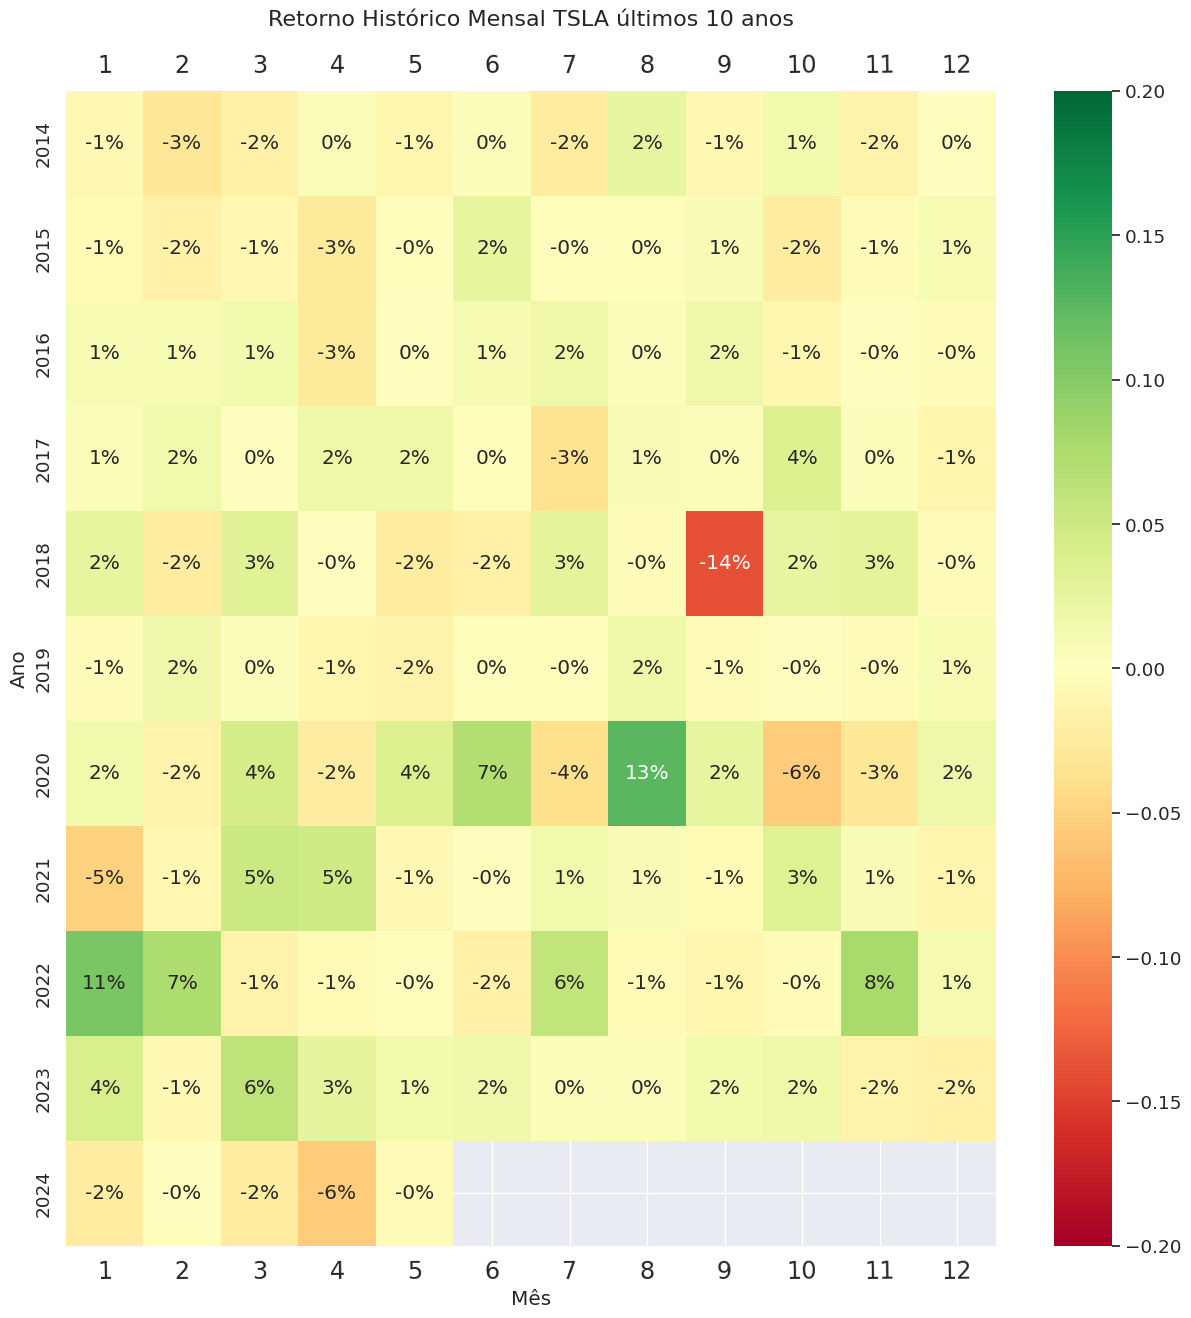

In [15]:
# Heatmap do Retorno Histórico Mensal TSLA últimos 10 anos


plt.figure(figsize=(15,15))                             # Tamanho da figura
sns.set(font_scale=1.2)                                 # Escala da fonte
ax = sns.heatmap(tab_retorno_mensal['TSLA'],
                 annot = True,                          # Acrescenta o valor em cada célula
                 fmt = '.0%',                           # Insere o número de casas decimais do valor
                 center =0,                             # Estabelece a posição do valor
                 vmin=-0.2,                             # Range mínimo de ancoramento dos valores
                 vmax=0.2,                              # Range máximo de ancoramento dos valores
                 cmap='RdYlGn')                         # Range de paleta de cores entre verde e vermelho
ax.set_title('Retorno Histórico Mensal TSLA últimos 10 anos', fontdict={'fontsize':16, 'fontweight':6},pad=20);
ax.tick_params('x', labelsize='large', labelrotation=0.9, labeltop = True)

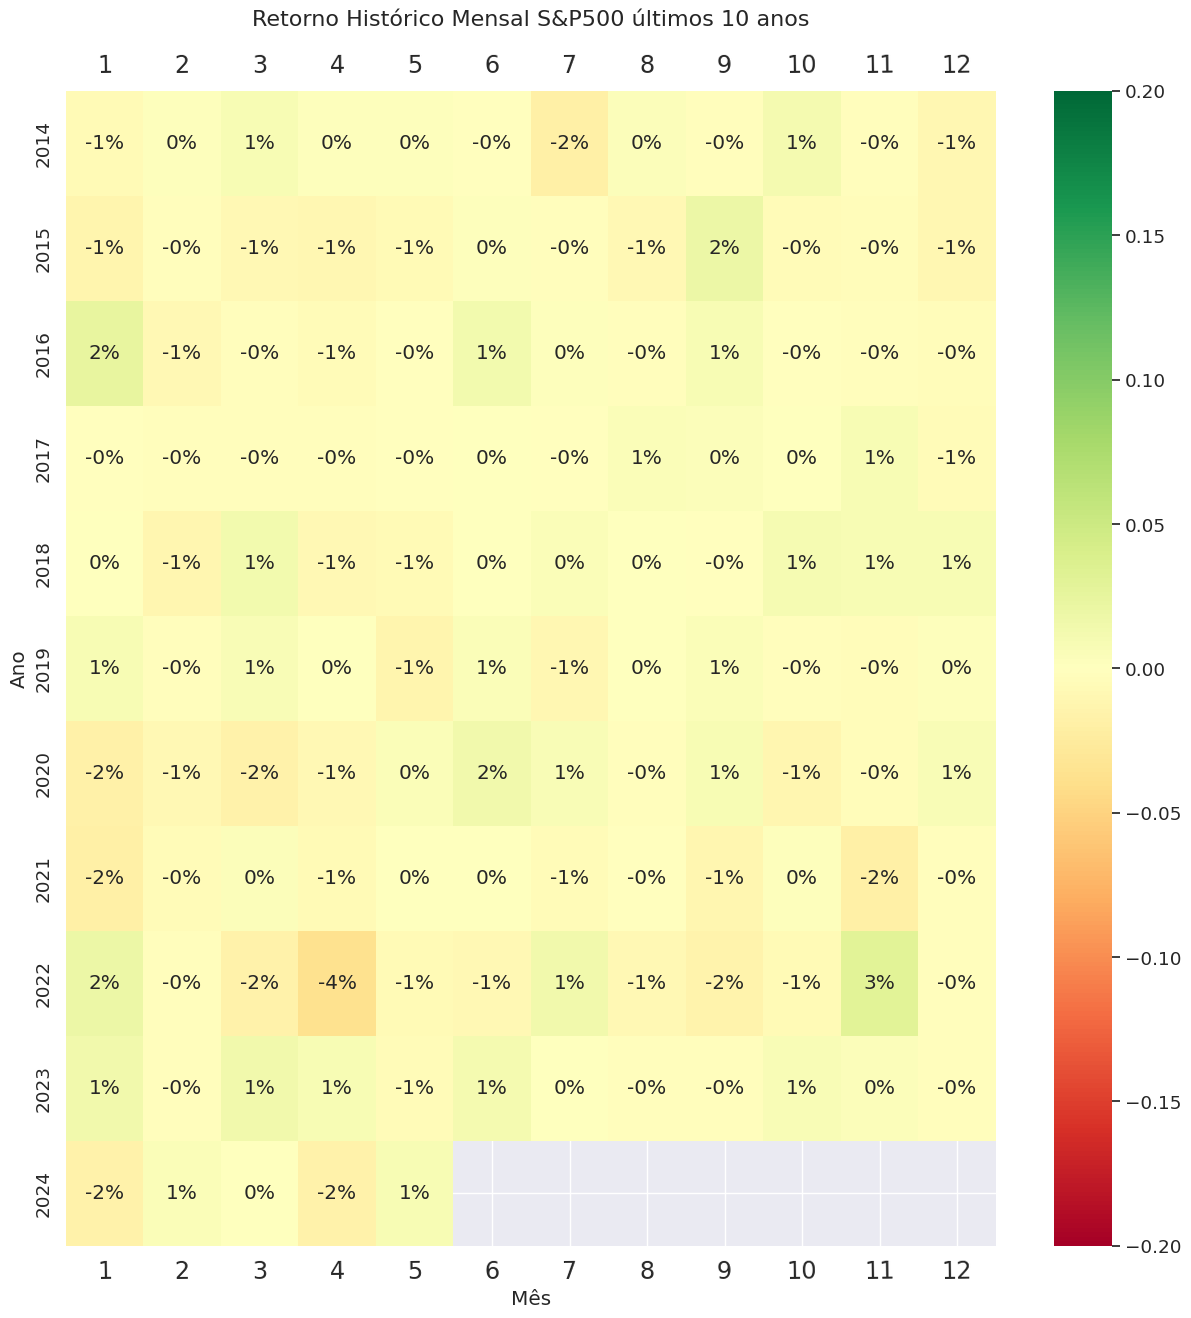

In [16]:
# Heatmap do Retorno Histórico Mensal S&P 500 últimos 10 anos


plt.figure(figsize=(15,15))                             # Tamanho da figura
sns.set(font_scale=1.2)                                 # Escala da fonte
ax = sns.heatmap(tab_retorno_mensal['SP500'],
                 annot = True,                          # Acrescenta o valor em cada célula
                 fmt = '.0%',                           # Insere o número de casas decimais do valor
                 center =0,                             # Estabelece a posição do valor
                 vmin=-0.2,                             # Range mínimo de ancoramento dos valores
                 vmax=0.2,                              # Range máximo de ancoramento dos valores
                 cmap='RdYlGn')                         # Range de paleta de cores entre verde e vermelho
ax.set_title('Retorno Histórico Mensal S&P500 últimos 10 anos', fontdict={'fontsize':16, 'fontweight':6},pad=20);
ax.tick_params('x', labelsize='large', labelrotation=0.9, labeltop = True)

In [17]:
# Retorno anual das ações

# Observe que no acumulado bruto (não descontada taxa livre de risco), o ETF brasileiro apresenta o maior retorno de
# todos, nos últimos 7 anos.

fig = go.Figure()
fig.add_trace(go.Scatter(x=retorno.index, y=retorno['AAPL'], name='AAPL', line=dict(color ='gray', width=3)))
fig.add_trace(go.Scatter(x=retorno.index, y=retorno['AMZN'], name='AMAZN', line=dict(color ='black', width=3)))
fig.add_trace(go.Scatter(x=retorno.index, y=retorno['GOOG'], name='GOOG', line=dict(color ='green', width=3)))
fig.add_trace(go.Scatter(x=retorno.index, y=retorno['META'], name='META', line=dict(color ='blue', width=3)))
fig.add_trace(go.Scatter(x=retorno.index, y=retorno['MSFT'], name='MSFT', line=dict(color ='yellow', width=3)))
fig.add_trace(go.Scatter(x=retorno.index, y=retorno['NVDA'], name='NVDA', line=dict(color ='pink', width=3)))
fig.add_trace(go.Scatter(x=retorno.index, y=retorno['TSLA'], name='TSLA', line=dict(color ='red', width=3)))
fig.add_trace(go.Scatter(x=retorno.index, y=retorno['SP500'], name='SP500', line=dict(color ='orange', width=3)))

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20), template='simple_white',
                  paper_bgcolor='#f7f8fa', width=800, height=400)

fig.update_layout(
    title='Retorno anual das 7 maiores de tecnologia nos EUA',
    xaxis_title = 'Ano',
    yaxis_title = 'Retorno anual')

fig.show()

# 3) Retorno log normalizado

In [18]:
# Função para calcular o retorno log normalizado das ações

def ret_log_norm(cotacao):
  return_log_norm = np.log(cotacao / cotacao.iloc[0])
  return return_log_norm

retorno_log_norm = cotacao.apply(ret_log_norm, axis=0)
retorno_log_norm = retorno_log_norm.dropna()
retorno_log_norm.head()

Ticker          AAPL      AMZN      GOOG      META      MSFT      NVDA  \
Date                                                                     
2014-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2014-01-03 -0.022211 -0.003852 -0.007322 -0.002745 -0.006750 -0.012052   
2014-01-06 -0.016772 -0.010965  0.003766  0.044507 -0.028109  0.001260   
2014-01-07 -0.023950  0.000151  0.022861  0.057016 -0.020389  0.017501   
2014-01-08 -0.017637  0.009876  0.024940  0.062354 -0.038403  0.031039   

Ticker          TSLA     SP500  
Date                            
2014-01-02  0.000000  0.000000  
2014-01-03 -0.003604 -0.000333  
2014-01-06 -0.020869 -0.002848  
2014-01-07 -0.004942  0.003215  
2014-01-08  0.007831  0.003003

# 4) Retorno acumulado

In [19]:
# Função para calcular o retorno acumulado normalizado das ações

def ret_acum(retorno_log_norm):
  return_acum = (1 + retorno_log_norm[1:]).cumprod() - 1
  return return_acum

retorno_acum = retorno_log_norm.apply(ret_acum, axis=0)
retorno_acum = retorno_log_norm.dropna()
retorno_acum.tail()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: RuntimeWarning:

overflow encountered in accumulate



Ticker          AAPL      AMZN      GOOG      META      MSFT      NVDA  \
Date                                                                     
2024-05-24  2.397761  2.206470  1.850056  2.169085  2.624482  5.651207   
2024-05-28  2.397814  2.214186  1.859594  2.172633  2.624854  5.718683   
2024-05-29  2.399392  2.213472  1.856106  2.160980  2.622178  5.726763   
2024-05-30  2.404633  2.198528  1.834222  2.145450  2.587808  5.688369   
2024-05-31  2.409639  2.182337  1.836524  2.144979  2.588916  5.680492   

Ticker          TSLA     SP500  
Date                            
2024-05-24  2.885474  1.063200  
2024-05-28  2.871485  1.063448  
2024-05-29  2.868311  1.056054  
2024-05-30  2.882960  1.050061  
2024-05-31  2.878981  1.058057

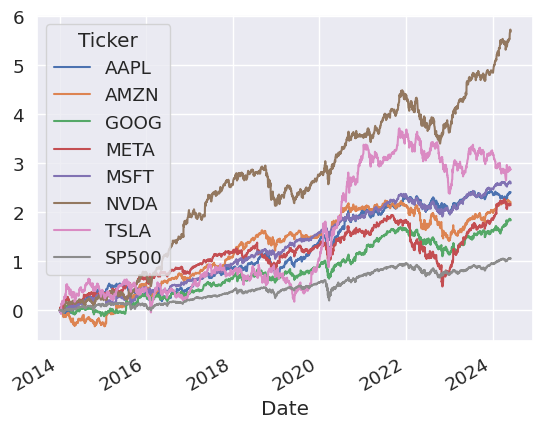

In [20]:
# Gráfico do retorno acumulado

# Todas as empresas obtiveram alto retorno acumulado com destaque a NVDA, que obteve um fator multiplicador
# de 5,7x o valor investido.

retorno_acum.plot();

In [21]:
# Retorno acumulado normalizado das ações

# Observe que no acumulado bruto (não descontada taxa livre de risco), o ETF brasileiro apresenta o maior retorno de
# todos, nos últimos 7 anos.

fig = go.Figure()
fig.add_trace(go.Scatter(x=retorno_log_norm.index, y=retorno['AAPL'], name='AAPL', line=dict(color ='gray', width=3)))
fig.add_trace(go.Scatter(x=retorno_log_norm.index, y=retorno['AMZN'], name='AMAZN', line=dict(color ='black', width=3)))
fig.add_trace(go.Scatter(x=retorno_log_norm.index, y=retorno['GOOG'], name='GOOG', line=dict(color ='green', width=3)))
fig.add_trace(go.Scatter(x=retorno_log_norm.index, y=retorno['META'], name='META', line=dict(color ='blue', width=3)))
fig.add_trace(go.Scatter(x=retorno_log_norm.index, y=retorno['MSFT'], name='MSFT', line=dict(color ='yellow', width=3)))
fig.add_trace(go.Scatter(x=retorno_log_norm.index, y=retorno['NVDA'], name='NVDA', line=dict(color ='pink', width=3)))
fig.add_trace(go.Scatter(x=retorno_log_norm.index, y=retorno['TSLA'], name='TSLA', line=dict(color ='red', width=3)))
fig.add_trace(go.Scatter(x=retorno_log_norm.index, y=retorno['SP500'], name='SP500', line=dict(color ='orange', width=3)))

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20), template='simple_white',
                  paper_bgcolor='#f7f8fa', width=800, height=400)

fig.update_layout(
    title='Retorno log acumulado das 7 maiores de tecnologia nos EUA',
    xaxis_title = 'Ano',
    yaxis_title = 'Retorno normalizado')

fig.show()

# 5) Excesso de retorno

In [22]:
# Taxa livre de risco

# A Taxa livre de risco americana utilizada é a média do último ano do EUA T bond 10 year
taxa_livre = yf.download('^TNX', period='1y')['Adj Close'].mean() /100

taxa_livre

[*********************100%%**********************]  1 of 1 completed


0.04253703552743663

Ticker
AAPL     0.228914
AMZN     0.221251
GOOG     0.173159
META     0.235555
MSFT     0.242397
NVDA     0.611719
TSLA     0.388636
SP500    0.074626
dtype: float64


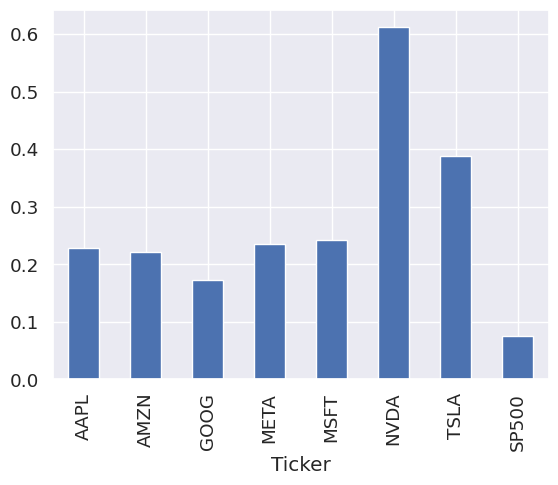

In [23]:
# Função para calcular o excesso de retorno das ações

def exc_return(retorno_acao, trading_days, taxa_livre):
    """ Função para calcular o excesso de retorno de cada ação
        Excesso de retorno = retorno diário da ação - taxa livre de risco ajustada aos dias"""
    return retorno_acao.mean() * trading_days - taxa_livre

trading_days = 252
excess = retorno.apply(exc_return, args=(trading_days,taxa_livre,),axis=0)

print(excess)
excess.plot.bar();


# 6) Volatilidade

Ticker
AAPL     28.0
AMZN     33.0
GOOG     28.0
META     38.0
MSFT     27.0
NVDA     47.0
TSLA     56.0
SP500    18.0
dtype: float64


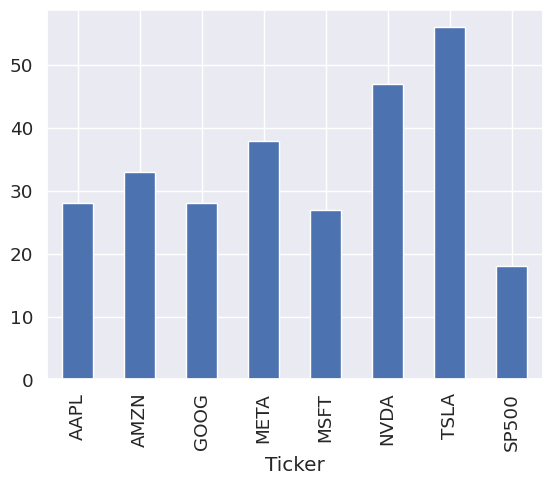

In [24]:
# Função para calcular a Volatilidade das ações

def volatilidade(retorno_acao, trading_days):
     """ Função para calcular a volatilidade de cada ação
         volatilidade = Desvio padrão do retorno diário da ação ajustado aos dias"""
     return retorno_acao.std() * np.sqrt(trading_days)

trading_days = 252
volat = retorno.apply(volatilidade, args=[trading_days], axis=0)
volat = round(volat, 2) *100

print(volat)
volat.plot.bar();

# 7) Sharp Ratio


Ticker
AAPL     0.81
AMZN     0.67
GOOG     0.62
META     0.62
MSFT     0.90
NVDA     1.31
TSLA     0.70
SP500    0.43
dtype: float64


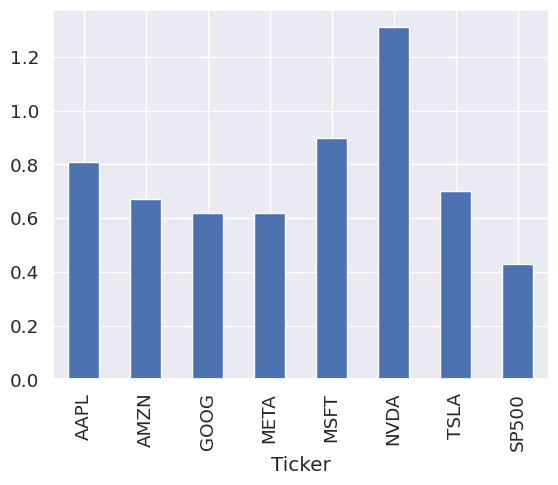

In [25]:
# Função para calcular o Sharpe Ratio das ações

def sharpe_ratio(retorno_acao, trading_days, taxa_livre):
    """ Função para calcular o Sharpe Ratio de cada ação
        Sharpe Ratio = Excesso de retorno da ação / volatilidade da ação"""
    exc_return = retorno_acao.mean() * trading_days - taxa_livre
    volatilidade = retorno_acao.std() * np.sqrt(trading_days)
    return exc_return / volatilidade

trading_days = 252
sharpes = retorno.apply(sharpe_ratio, args=(trading_days,taxa_livre,),axis=0)
sharpes = round(sharpes,2)

print(sharpes)
sharpes.plot.bar();

# 8) Critério de Kelly

Ticker
AAPL     2.89
AMZN     2.05
GOOG     2.21
META     1.66
MSFT     3.37
NVDA     2.81
TSLA     1.26
SP500    2.43
dtype: float64


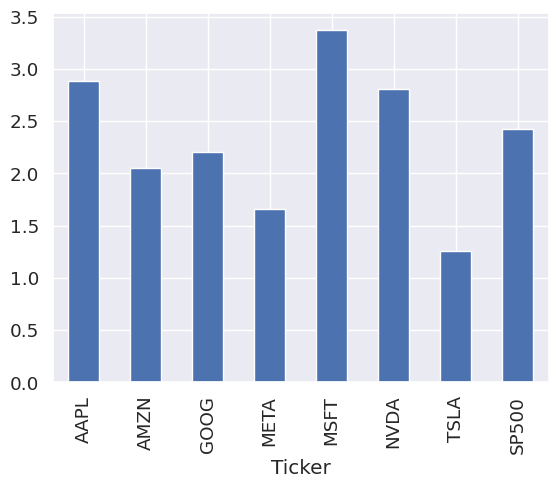

In [26]:
# Função para calcular o Critério de Kelly das ações

def kelly_criterion(retorno_acao, trading_days, taxa_livre):
    """ Função para calcular o Critério de Kelly de cada ação
        Critério de Kelly = Excesso de retorno da ação / (volatilidade da ação)**2"""
    exc_return = retorno_acao.mean() * trading_days - taxa_livre
    volatilidade = retorno_acao.std() * np.sqrt(trading_days)
    return exc_return / volatilidade **2

trading_days = 252
kelly = retorno.apply(kelly_criterion, args=(trading_days,taxa_livre,),axis=0)
kelly = round(kelly,2)

print(kelly)
kelly.plot.bar();

# 9) Sortino Ratio

Ticker
AAPL     1.12
AMZN     0.95
GOOG     0.86
META     0.80
MSFT     1.25
NVDA     1.95
TSLA     1.02
SP500    0.52
dtype: float64


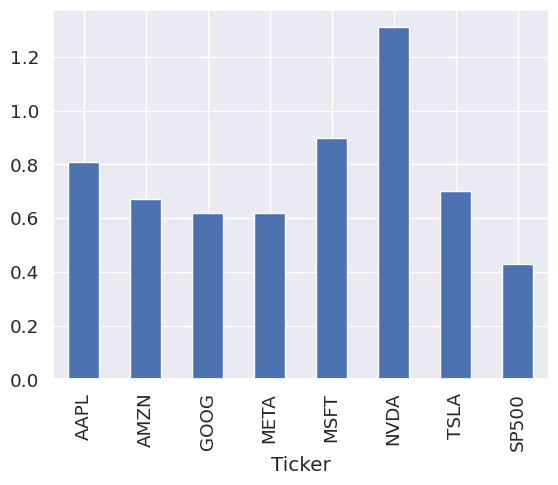

In [27]:
# Função para calcular o Sortino Ratio das ações

def sortino_ratio(retorno_acao, trading_days, taxa_livre):
    """ Função para calcular o Sortino Ratio de cada ação
        Sortino Ratio = Excesso de retorno da ação / volatilidade dos retornos negativos da ação"""
    exc_return = retorno_acao.mean() * trading_days - taxa_livre
    volatilidade_neg = retorno_acao[retorno_acao <0].std() * np.sqrt(trading_days)
    return exc_return / volatilidade_neg

trading_days = 252
sortino = retorno.apply(sortino_ratio, args=(trading_days,taxa_livre,),axis=0)
sortino = round(sortino,2)

print(sortino)
sharpes.plot.bar();

# 10) Máximo Drawdown

Ticker
AAPL    -39.0
AMZN    -56.0
GOOG    -45.0
META    -77.0
MSFT    -37.0
NVDA    -66.0
TSLA    -74.0
SP500   -34.0
dtype: float64


Text(0, 0.5, 'Max Drawdown')

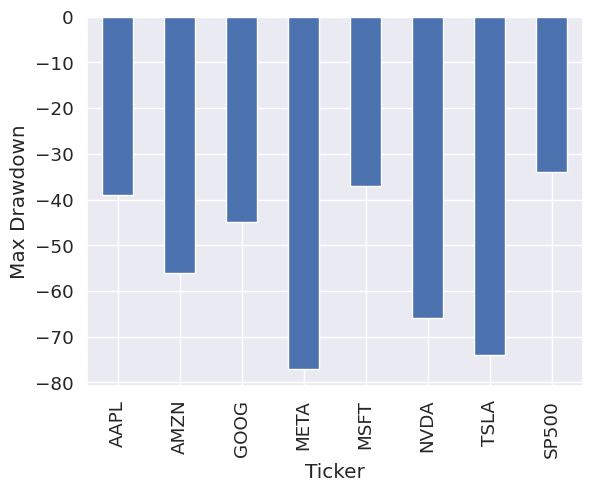

In [28]:
# Função para calcular o Máximo Drawdown das ações

def max_drawdown(retorno_acao):
    """ Função para calcular o Máximo Drawdown de cada ação
        Máximo Drawdown = (Pico de retorno da ação - Mínima de retorno da ação) / Pico de retorno da ação"""
    comp_ret = (retorno_acao +1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()

max_drawdowns = retorno.apply(max_drawdown,axis=0)
max_drawdowns = round(max_drawdowns,2) *100
max_drawdowns.plot.bar()

print(max_drawdowns)
plt.ylabel('Max Drawdown')

# 11) Calmar Ratio

Ticker  AAPL  AMZN  GOOG  META  MSFT  NVDA  TSLA  SP500
Ticker                                                 
AAPL    0.59  0.57  0.45  0.61  0.63  1.59  1.01   0.19
AMZN    0.41  0.39  0.31  0.42  0.43  1.09  0.69   0.13
GOOG    0.51  0.50  0.39  0.53  0.54  1.37  0.87   0.17
META    0.30  0.29  0.23  0.31  0.32  0.80  0.51   0.10
MSFT    0.62  0.60  0.47  0.63  0.65  1.65  1.05   0.20
NVDA    0.35  0.33  0.26  0.36  0.37  0.92  0.59   0.11
TSLA    0.31  0.30  0.24  0.32  0.33  0.83  0.53   0.10
SP500   0.67  0.65  0.51  0.69  0.71  1.80  1.15   0.22


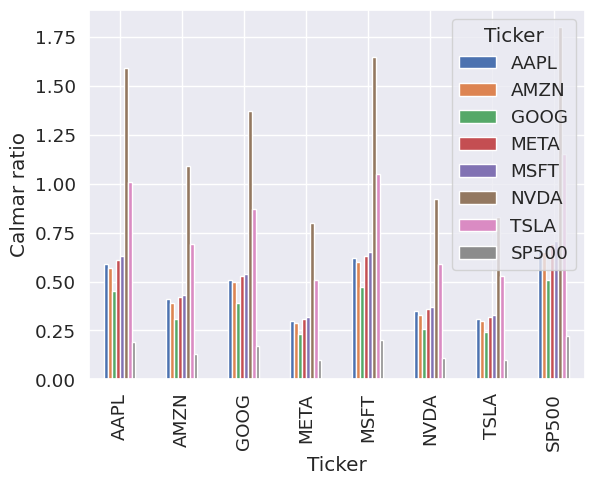

In [29]:
# Função para calcular o Calmar Ratio das ações

def calmar_ratio(retorno_acao, trading_days, taxa_livre):
    """ Função para calcular o Calmar Ratio de cada ação
        Calmar Ratio = Excesso de Retorno da ação / Máximo Drawdown da ação"""
    exc_return = retorno_acao.mean() * trading_days - taxa_livre
    maxim_drawdown = retorno.apply(max_drawdown,axis=0)
    return exc_return / abs(maxim_drawdown)

trading_days = 252
calmar = retorno.apply(calmar_ratio, args=(trading_days,taxa_livre,),axis=0)
calmar = round(calmar,2)

print(calmar)
calmar.plot.bar()
plt.ylabel('Calmar ratio');

# 12) Beta

Ticker
AAPL     1.19
AMZN     1.15
GOOG     1.15
META     1.29
MSFT     1.21
NVDA     1.69
TSLA     1.46
SP500    1.00
dtype: float64


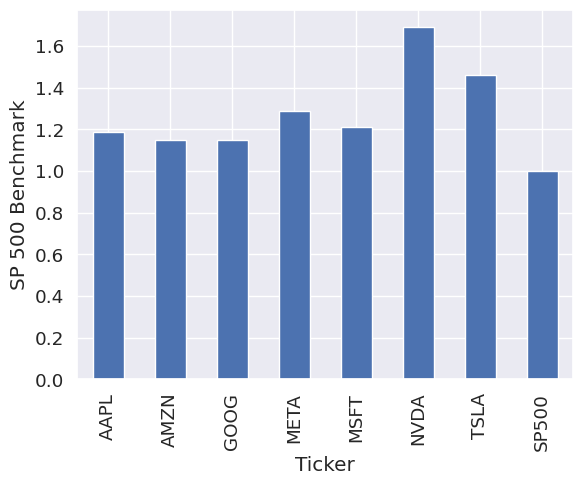

In [30]:
# Função para calcular o Beta das ações

def beta(retorno_acao, retorno_mercado=retorno['SP500']):
  """ Função para calcular o Beta de cada ação
      Beta = Covariância entre o Retorno da ação e Retorno do Mercado  / Variância do Retorno do Mercado"""
  covariance = np.cov(retorno_acao[1:], retorno_mercado[1:])
  variance = np.var(retorno_mercado[1:])
  return covariance[0,1] / variance

beta_coef = retorno.apply(beta, axis=0)
beta_coef = round(beta_coef,2)

print(beta_coef)
beta_coef.plot.bar()
plt.ylabel('SP 500 Benchmark');

# 13) Treynor Ratio

Ticker
AAPL     0.19
AMZN     0.19
GOOG     0.15
META     0.18
MSFT     0.20
NVDA     0.36
TSLA     0.27
SP500    0.07
dtype: float64


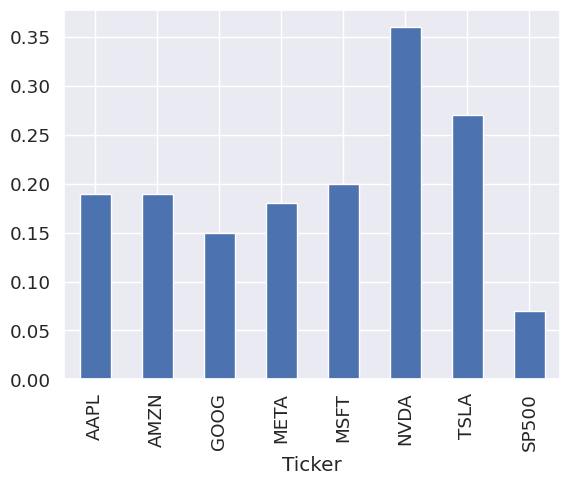

In [31]:
# Função para calcular o Treynor Ratio das ações

def treynor_ratio(retorno_acao, trading_days, taxa_livre, retorno_mercado=retorno['SP500']):
      """ Função para calcular o Treynor Ratio de cada ação
          Treynor Ratio = Excesso de Retorno da ação  / Beta da Ação"""
      exc_return = retorno_acao.mean() * trading_days - taxa_livre
      covariance = np.cov(retorno_acao[1:], retorno_mercado[1:])
      variance = np.var(retorno_mercado[1:])
      return exc_return / (covariance[0,1] / variance)

trading_days = 252
treynor = retorno.apply(treynor_ratio, args=(trading_days,taxa_livre,),axis=0)
treynor = round(treynor,2)

print(treynor)
treynor.plot.bar();

# 14) Volatilidade EWMA

Ticker
AAPL     0.014
AMZN     0.013
GOOG     0.017
META     0.019
MSFT     0.013
NVDA     0.036
TSLA     0.035
SP500    0.007
dtype: float64


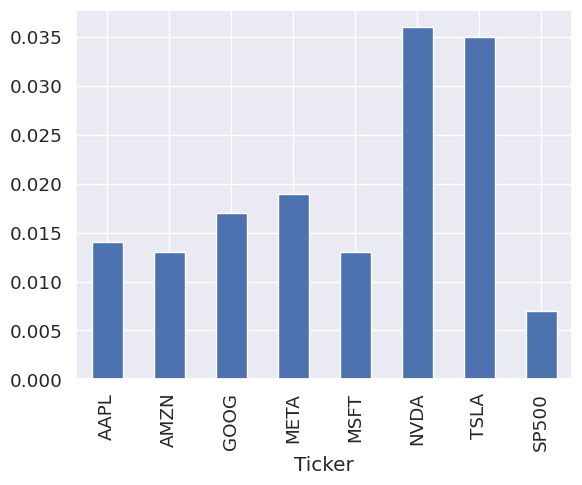

In [32]:
# Função para calcular a volatilidade EWMA das ações

def volatilidade_ewma(retorno_acao, lbda = 0.94):                    # Lambda é um parâmetro de importância dos retornos passados na estimação da vol futura. O valor sugerido pela consultoria RiskMetrics é 94%

    i = np.arange(len(retorno_acao)-1, -1, -1)                       # gera uma lista decrescente do número total de elementos menos um até 0
    variancia = ((1 - lbda) * lbda ** i * retorno_acao ** 2).sum()   # aplicação da formula para gerar a variância
    vol = np.sqrt(variancia)                                         # calcula a volatilidade (std) da variância ponderada
    return vol

vol_ewma = retorno.apply(volatilidade_ewma, axis=0)
vol_ewma = round(vol_ewma,3)

print(vol_ewma)
vol_ewma.plot.bar();

## 14.1) Desvio da volatilidade EWMA

Ticker
AAPL    -21.09
AMZN    -37.23
GOOG     -3.59
META    -20.01
MSFT    -23.02
NVDA     22.52
TSLA     -0.13
SP500   -36.58
dtype: float64


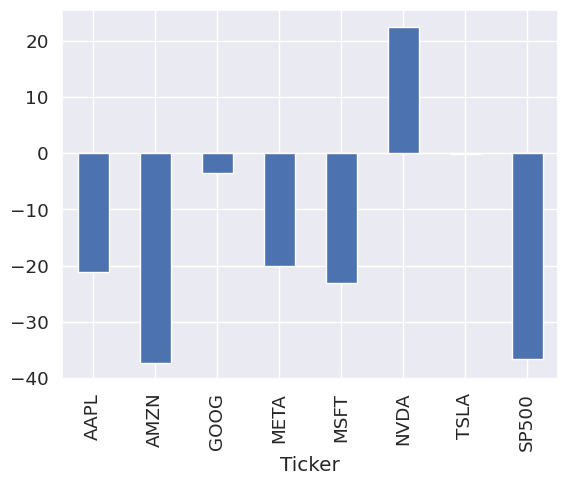

In [33]:
std_EWMA = (vol_ewma / retorno.std() -1) * 100
std_EWMA = round(std_EWMA,2)

print(std_EWMA)
std_EWMA.plot.bar();

# 15) VaR Paramétrico

In [34]:
print('Um nível de confiança de 99% equivale a', round(norm.ppf(.99),2) , 'desvios padrão na distribuição normal')
print('Um nível de confiança de 95% equivale a', round(norm.ppf(.95),2) , ' desvios padrão na distribuição normal')

Um nível de confiança de 99% equivale a 2.33 desvios padrão na distribuição normal
Um nível de confiança de 95% equivale a 1.64  desvios padrão na distribuição normal


Ticker
AAPL    -29184.04
AMZN    -34067.65
GOOG    -29004.65
META    -39071.57
MSFT    -27779.04
NVDA    -48331.75
TSLA    -57647.41
SP500   -18155.84
dtype: float64
O modelo tem 5.0 % de chances de perder US$ -29184.04 numa aplicação de US$ 1.000.000 no trade de 1 dia da empresa AAPL
O modelo tem 5.0 % de chances de perder US$ -34067.65 numa aplicação de US$ 1.000.000 no trade de 1 dia da empresa AMZN
O modelo tem 5.0 % de chances de perder US$ -29004.65 numa aplicação de US$ 1.000.000 no trade de 1 dia da empresa GOOG
O modelo tem 5.0 % de chances de perder US$ -39071.57 numa aplicação de US$ 1.000.000 no trade de 1 dia da empresa META
O modelo tem 5.0 % de chances de perder US$ -27779.04 numa aplicação de US$ 1.000.000 no trade de 1 dia da empresa MSFT
O modelo tem 5.0 % de chances de perder US$ -48331.75 numa aplicação de US$ 1.000.000 no trade de 1 dia da empresa NVDA
O modelo tem 5.0 % de chances de perder US$ -57647.41 numa aplicação de US$ 1.000.000 no trade de 1 dia da empresa

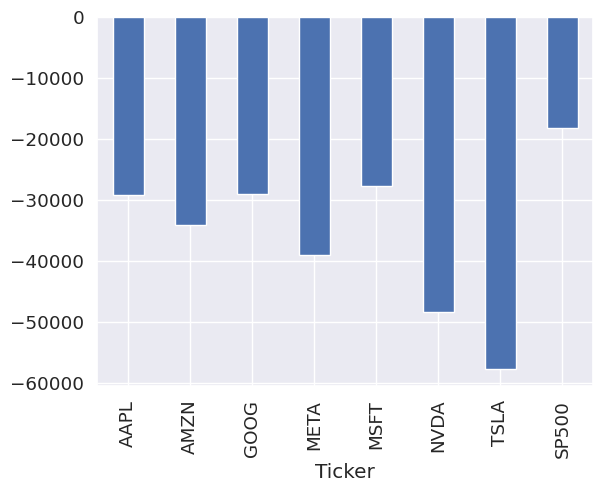

In [35]:
# Função para calcular o Var paramétrico das ações

def var_parametrico(retorno_acao, nivel_confianca= 0.95, aplicacao= 1000000, trading_days=1):
  """ Função para calcular o Var Paramétrico de cada ação
      Var Paramétrico = Retorno médio - Zscore para 95% do nível de confiança * Volatilidade * Valor aplicado"""
  vat = retorno_acao.mean() - norm.ppf(nivel_confianca) * retorno_acao.std() * np.sqrt(trading_days) * aplicacao
  return vat

nivel_confianca= 0.95
var_param = retorno.apply(var_parametrico,axis=0)
var_param = round(var_param,2)
print(var_param)
for i,j in var_param.items():
  print('O modelo tem', round(1 - nivel_confianca,2)*100, '% de chances de perder US$', j, 'numa aplicação de US$ 1.000.000 no trade de 1 dia da empresa', i  )
var_param.plot.bar();